Heart Disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Đọc bộ dữ liệu Heart Disease và kiểm tra hình dạng dữ liệu

In [2]:
data = pd.read_csv("/content/drive/MyDrive/LastReport-DataMining/heart_2020_cleaned.csv")

In [3]:
data.shape
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


2. Kiểm tra thống kê cơ bản của dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
data['HeartDisease'].value_counts()


No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Các giá trị trùng lặp trong DataFrame

In [4]:
data.duplicated().sum()

18078

In [5]:
# xoá các giá trị trung lặp trong DataFrame
data.drop_duplicates(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

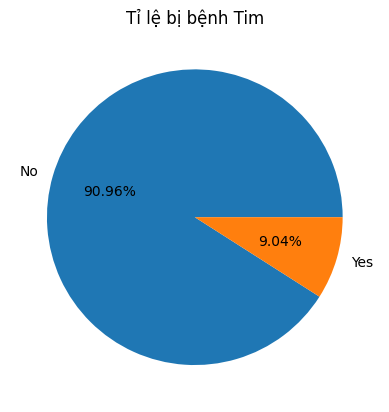

In [10]:
#show Ratio of HeartDisease from data
plt.pie(x = data['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,
        labels=data['HeartDisease'].value_counts().index)
plt.title('Tỉ lệ bị bệnh Tim')
plt.show


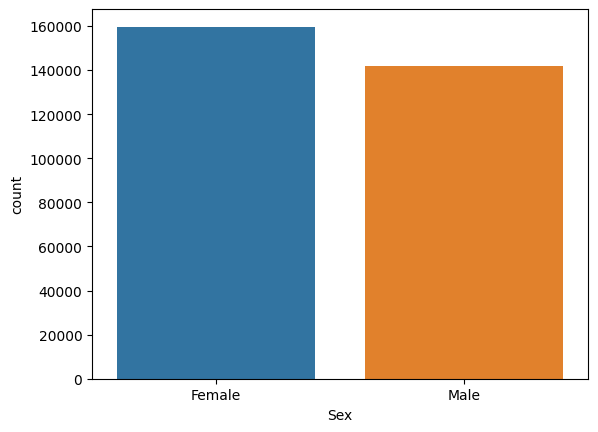

In [11]:
import seaborn as sns

sns.countplot(x = data['Sex'])
plt.show()

In [12]:
data.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

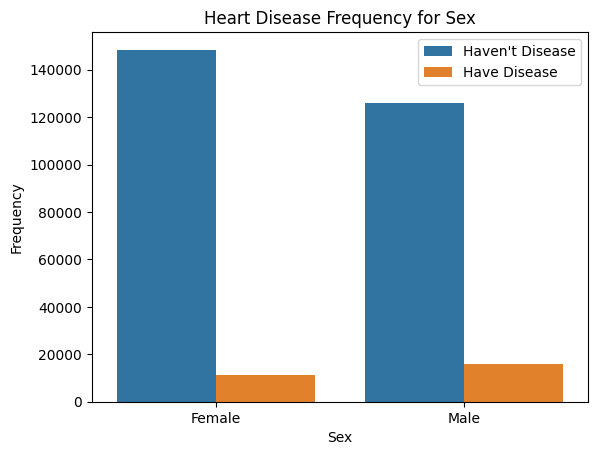

In [13]:
sns.countplot(x = data['Sex'], data = data, hue ='HeartDisease')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [14]:
data['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [15]:
data.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

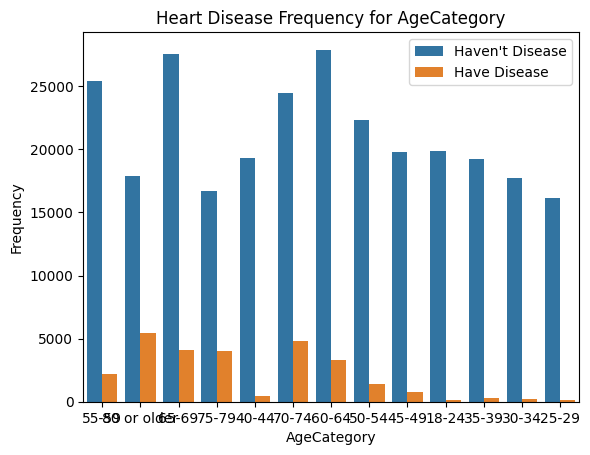

In [16]:
sns.countplot(x ='AgeCategory', data = data, hue ='HeartDisease')
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [17]:
data['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [18]:
data.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

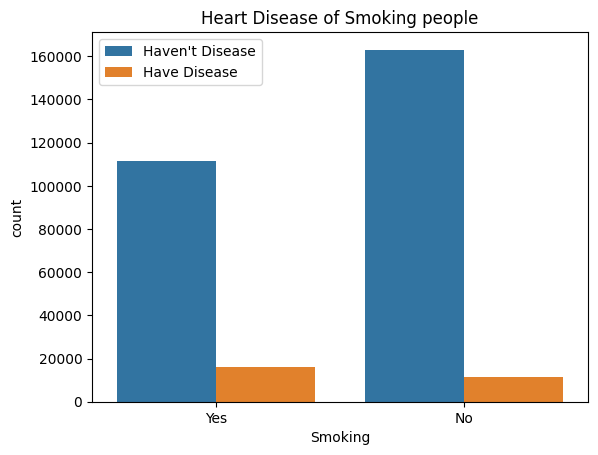

In [19]:
sns.countplot(x='Smoking',data = data,hue='HeartDisease')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [20]:
data['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [21]:
data.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [22]:
data.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

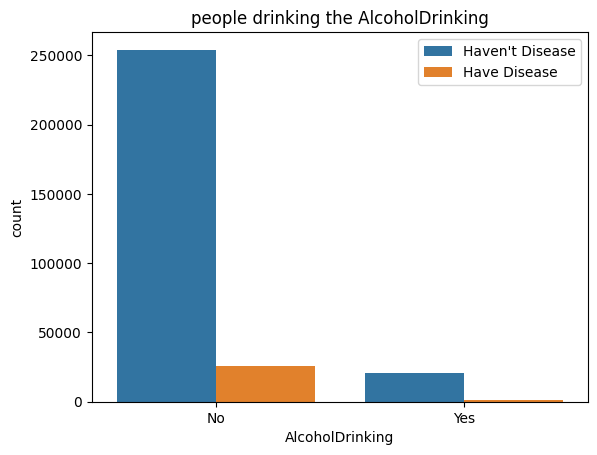

In [23]:
sns.countplot(x = data['AlcoholDrinking'],data = data , hue ='HeartDisease')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [24]:
data['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [25]:
data.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

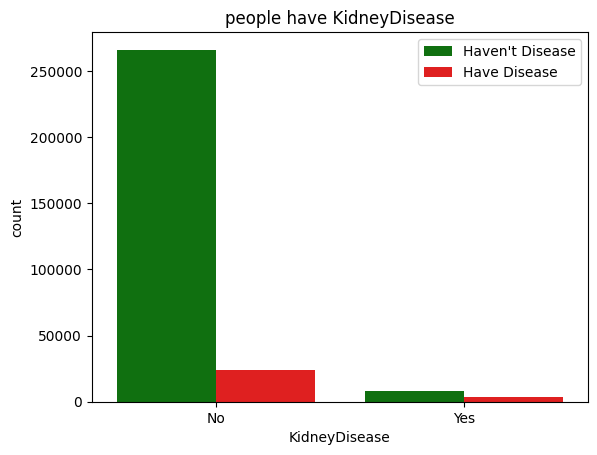

In [26]:
sns.countplot( x = 'KidneyDisease', data=data, hue='HeartDisease',palette=['green','red'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()


In [27]:
data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

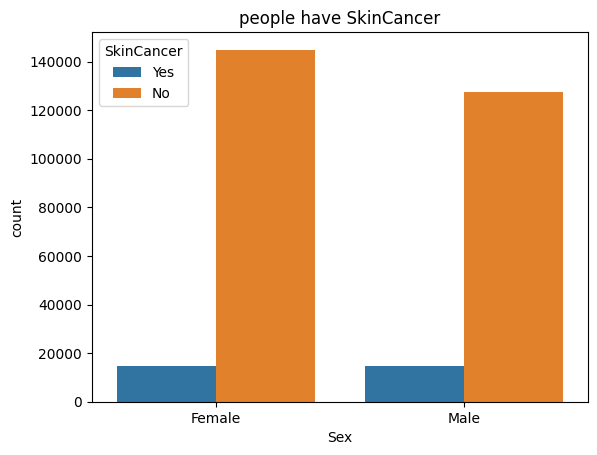

In [28]:
sns.countplot(x='Sex',data = data, hue='SkinCancer')
plt.title('people have SkinCancer')
plt.show()

In [29]:
data.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

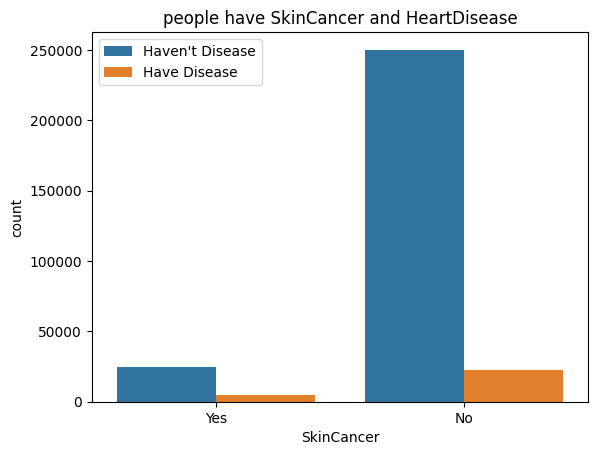

In [30]:
sns.countplot(x = 'SkinCancer', data = data , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [7]:
#tạo ra một bản sao của tập dữ liệu data mà loại bỏ cột 'HeartDisease'
x = data.drop('HeartDisease', axis=1)
#tạo ra một bản sao của tập dữ liệu data chỉ chứa dữ liệu từ cột 'HeartDisease'
y = data['HeartDisease']

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in data:
    data[col]=label.fit_transform(data[col])
data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
tree = DecisionTreeClassifier()

In [10]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
tree.score(x_test,y_test)

0.8536943744752309

In [12]:
tree.score(x,y)

0.9543777778514303

In [13]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=42)

In [14]:
x_new , y_new = over.fit_resample(x,y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, train_size=0.7,random_state=42)

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:

# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=x.columns, class_names=['Have not Disease', 'Have Disease'], filled=True, rounded=True)
plt.show()

Error in callback <function flush_figures at 0x7b8254dd03a0> (for post_execute):


KeyboardInterrupt: ignored

In [17]:
from sklearn.tree import export_text
rules = export_text(tree, feature_names = x.columns.tolist())
print(rules)

|--- AgeCategory <= 7.50
|   |--- Stroke <= 0.50
|   |   |--- DiffWalking <= 0.50
|   |   |   |--- AgeCategory <= 5.50
|   |   |   |   |--- PhysicalHealth <= 14.50
|   |   |   |   |   |--- Diabetic <= 0.50
|   |   |   |   |   |   |--- Smoking <= 0.50
|   |   |   |   |   |   |   |--- AgeCategory <= 4.50
|   |   |   |   |   |   |   |   |--- BMI <= 1275.50
|   |   |   |   |   |   |   |   |   |--- SleepTime <= 9.50
|   |   |   |   |   |   |   |   |   |   |--- AgeCategory <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 33
|   |   |   |   |   |   |   |   |   |   |--- AgeCategory >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |--- SleepTime >  9.50
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 412.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- BMI >  412.00
|   |   |   |   |   |   |   |   |   |   |   |

In [43]:
tree_testing_score = dt.score(x_test,y_test)
print("Evaluate the model on the testing data: ", tree_testing_score)

Evaluate the model on the testing data:  0.9484860998093202


In [44]:
tree_training_score = dt.score(x_train,y_train)
print("Evaluate the model on the training data: ",tree_training_score)

Evaluate the model on the training data:  0.9979361749748854


RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [39]:
rf_testing_score = rf.score(x_test, y_test)
print("Calculate the accuracy score on the testing data:",rf_testing_score)


Calculate the accuracy score on the testing data: 0.9631818016201708


In [46]:
rf_training_score = rf.score(x_train, y_train)
print("Calculate the accuracy score on the training data:", rf_training_score)

Calculate the accuracy score on the training data: 0.9979309698676341


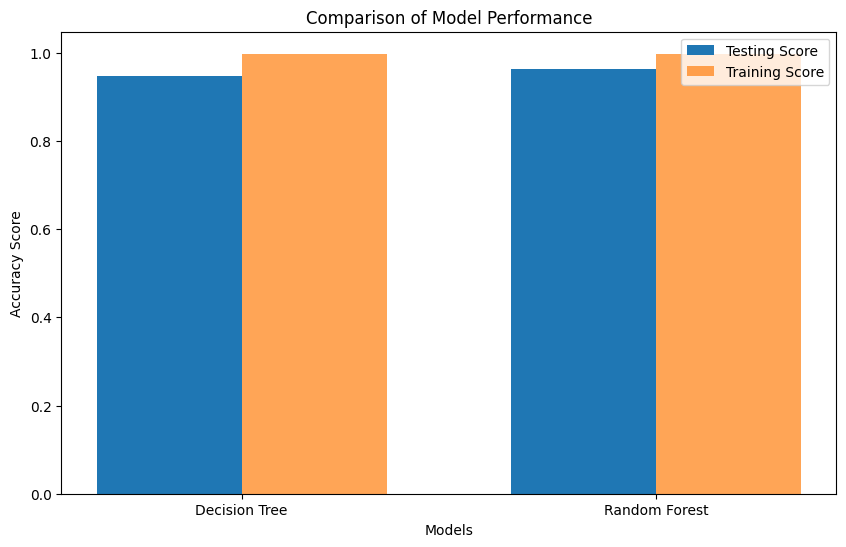

In [52]:
models = ['Decision Tree', 'Random Forest']
testing_scores = [tree_testing_score, rf_testing_score]
training_scores = [tree_training_score, rf_training_score]

bar_width = 0.35  # Độ rộng của mỗi cột
index = range(len(models))  # Số chỉ mục cho mỗi thuật toán

plt.figure(figsize=(10, 6))
plt.bar(index, testing_scores, bar_width, label='Testing Score')
plt.bar([i + bar_width for i in index], training_scores, bar_width, label='Training Score', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')
plt.xticks([i + bar_width/2 for i in index], models)  # Đặt nhãn cho các chỉ mục
plt.legend()
plt.show()
